In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from spectral import *
import numpy as np
import PIL
import sympy as sp
from mpmath import *
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#img = aviris.open('f970619t01p02_r02_sc05.a.rfl','f970619t01p02_r02.a.spc')
img = aviris.open('hawaii_sc01.raw')

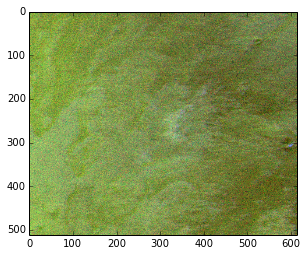

In [4]:
view = imshow(img, (1,2,200))

In [5]:
img

	Data Source:   './hawaii_sc01.raw'
	# Rows:            512
	# Samples:         614
	# Bands:           224
	Interleave:        BIP
	Quantization:  16 bits
	Data format:     int16

In [6]:
arr = img.load()

In [7]:
block = []
for i in range(224):
    data = arr[:40,:40,i].astype(np.float32)*10000 
    block.append(data)

In [8]:
corr = []
for i in range(223):
    cor = np.corrcoef(block[i].reshape(-1), block[i+1].reshape(-1))[0][1]
    corr.append(cor)

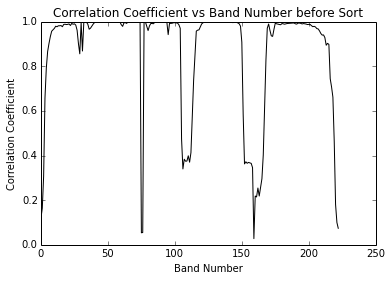

In [9]:
plt.figure(1)
plt.plot(range(0,223),corr, 'k')
plt.xlabel('Band Number')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient vs Band Number before Sort')
plt.show()
#Correlation ended

In [10]:
def swap(i, j):                    
    sqc[i], sqc[j] = sqc[j], sqc[i] 

def heapify(end,i):   
    l=2 * i + 1  
    r=2 * (i + 1)   
    max=i   
    if l < end and sqc[i] < sqc[l]:   
        max = l   
    if r < end and sqc[max] < sqc[r]:   
        max = r   
    if max != i:   
        swap(i, max)   
        heapify(end, max)   

def heap_sort():     
    end = len(sqc)   
    start = end / 2 - 1
    for i in range(start, -1, -1):   
        heapify(end, i)   
    for i in range(end-1, 0, -1):   
        swap(i, 0)   
        heapify(i, 0) 

In [11]:
sqc = corr[:]
heap_sort()

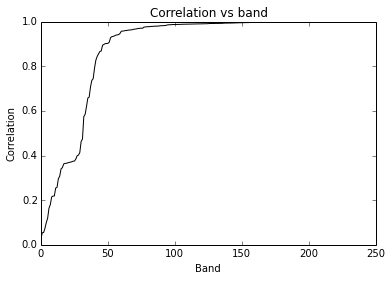

In [12]:
plt.figure(12)
plt.plot(range(0,223),sqc, 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()

In [13]:
indexi = []
for i in range(len(corr)):
    ind = corr.index(sqc[i])
    indexi.append(ind)
print 'process complete'

process complete


In [14]:
len(indexi)

223

In [15]:
rblock = []
for i in range(len(indexi)):
    rblock.append(block[indexi[i]])
rblock.append(block[223])
print 'process complete'

process complete


In [16]:
corrheap = []
for i in range(223):
    cor1 = np.corrcoef(rblock[i].reshape(-1), rblock[i+1].reshape(-1))[0][1]
    corrheap.append(cor1)
print corrheap

[0.03088725368080791, 0.053827638542003037, 0.036710368974462934, 0.099795508481439685, 0.012207449941594662, 0.11942699474272997, -0.00092780465552116671, 0.14846488211139441, 0.21842862236574384, 0.18887757254056933, 0.25433021620003732, 0.22971703637555985, 0.2571989119030122, 0.066240779251266868, 0.024381172714918263, 0.28373694720239295, 0.28333060551954725, 0.30425546030804246, 0.35142240538143343, 0.36295109440322454, 0.36915449124001842, 0.33412017144197115, 0.36375621469168729, 0.38185791825011534, 0.37443017150333963, 0.38030590232523098, 0.4032838018940475, -0.028577558041549118, 0.084197532072328038, 0.14676523675410444, 0.59695064255320041, 0.4851043123757055, 0.57162906320948526, 0.52150137019881138, 0.33541455035637213, 0.4093671397467617, 0.70727052002115287, 0.48194421251578162, 0.57214715948936079, 0.59612368311791186, 0.58405371840874376, 0.64708834109951485, 0.42960963346363457, 0.72568332496164545, 0.88503950712924095, 0.8041953792528681, 0.91697759659972955, 0.81

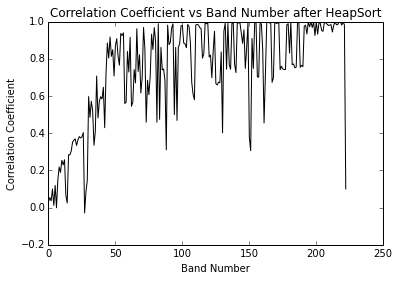

In [17]:
plt.figure(14)
plt.plot(range(0,223),corrheap, 'k')
plt.xlabel('Band Number')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient vs Band Number after HeapSort')
plt.show()

In [18]:
from sklearn.preprocessing import normalize

In [19]:
rblockn = []
for q in range(len(rblock)):
    xc = rblock[q]
    xv = normalize(xc)
    rblockn.append(xv)
print('Process Complete')

Process Complete


In [20]:
def zigzag(a):
    x = np.array(a)
    z = [y for y in range(-len(x)+1,len(x))]
    a = np.rot90(x)
    b = []
    e = 1
    for i in z:
        c = a.diagonal(i)
        d = c.tolist()
        if e == -1:
            d.reverse()
        b.append(d)
        e = e * -1
    flat  = [a0 for a1 in b for a0 in a1]
    return flat

In [21]:
finlist = []
for i in range(224):
    rblockyo = rblockn[i]
    xx = rblockyo[:5,:5]
    yy = zigzag(xx)
    finlist = finlist + yy

In [22]:
len(finlist)

5600

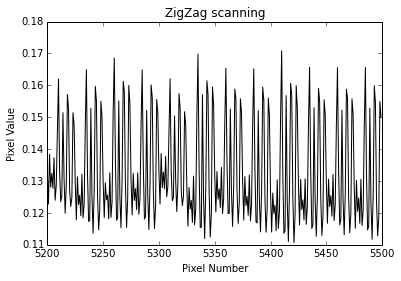

In [33]:
plt.figure(15)
plt.plot(range(5200,5500),finlist[5200:5500], 'k')
plt.xlabel('Pixel Number')
plt.ylabel('Pixel Value')
plt.title('ZigZag scanning')
plt.show()

In [24]:
import heapq
from collections import defaultdict

In [25]:
def encode(frequency):
    heap = [[weight, [symbol, '']] for symbol, weight in frequency.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heapq.heappop(heap)[1:], key=lambda p: (len(p[-1]), p))

In [26]:
def huffall(y):
    finli = map (lambda x: finlist[y*x:(x+1)*y], range (5600/y)) 
    huffcode = []
    lenhuff = []
    for sym in finli:
        frequency = defaultdict(int)
        for symbol in sym:
            frequency[symbol] += 1

        huff = encode(frequency)
        #print "Symbol".ljust(10) + "Weight".ljust(10) + "Huffman Code"
        for p in huff:
            x = str(p[1])
            ya = x.lstrip('0')
            lenyz = len(ya)
            #print  p[0] , str(frequency[p[0]]).ljust(10) , ya
            lenhuff.append(lenyz)
            huffcode.append(p[1])
        del frequency
    print 'process complete'
    print "The length of Huffcode", len(huffcode)
    cr = float(5600*16)/sum(lenhuff)
    print "The compression ratio for frame size", y, "is", cr

In [27]:
for i in range(5,30,5):
    huffall(i)
    print "_"*10

process complete
The length of Huffcode 5391
The compression ratio for frame size 5 is 9.31683477176
__________
process complete
The length of Huffcode 5239
The compression ratio for frame size 10 is 6.48570394499
__________
process complete
The length of Huffcode 5144
The compression ratio for frame size 15 is 5.57734204793
__________
process complete
The length of Huffcode 5098
The compression ratio for frame size 20 is 4.93936052922
__________
process complete
The length of Huffcode 4941
The compression ratio for frame size 25 is 4.59652182835
__________


In [28]:
frequency = defaultdict(int)
for symbol in finlist:
    frequency[symbol] += 1

huff = encode(frequency)
#print "Symbol".ljust(10) + "Weight".ljust(10) + "Huffman Code"
huffcode = []
lenhuff = []
for p in huff:
    x = str(p[1])
    ya = x.lstrip('0')
    lenyz = len(ya)
    #print  p[0] , str(frequency[p[0]]).ljust(10) , ya
    lenhuff.append(lenyz)
    huffcode.append(p[1])
print "process complete"

process complete


In [29]:
len(huffcode)

4939

In [30]:
cr = float(5600*16)/sum(lenhuff)
print "not in frame", cr

not in frame 1.54845845431
